In [1]:
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd


In [6]:
skipped_rows = range(1,1500000)

In [7]:
%matplotlib inline
data_init = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', skiprows=skipped_rows, encoding="utf-8-sig")
list(data_init)

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

In [8]:
timestamp_list = data_init['Timestamp']
close_data = data_init['Weighted_Price']

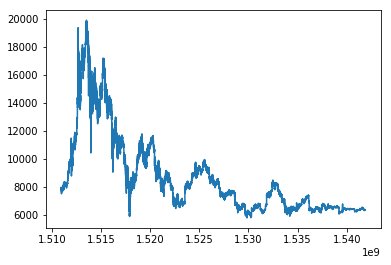

In [9]:
plt.plot(timestamp_list, close_data)